# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical technique used in data analysis and dimensionality reduction. Its primary objective is to transform a set of possibly correlated variables into a new set of linearly uncorrelated variables called principal components. These components are ordered by the amount of variance they explain in the original data, with the first principal component explaining the maximum variance.

PCA achieves this transformation by identifying the directions (principal components) in which the data varies the most. The first principal component corresponds to the direction of maximum variance, and each subsequent component captures the highest remaining variance orthogonal to the previous components. By expressing data in terms of these principal components, one can reduce the dimensionality of the dataset while retaining most of the important information.

PCA is a powerful tool for simplifying complex datasets and revealing underlying patterns and structures.

<img src= "https://miro.medium.com/v2/resize:fit:1400/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg">

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_theme()

# Load the Wine dataset
wine_data = load_wine()
columns = wine_data.feature_names + ['target']

# Create a DataFrame
wine_df = pd.DataFrame(data=np.c_[wine_data.data, wine_data.target], columns=columns)

# Separate features and target
X = wine_df.drop('target', axis=1).to_numpy()
y = wine_df['target'].to_numpy()

The objective of PCA is to reduce the dimensionality of feature vectors utilized in training machine learning algorithms. The steps involved in PCA are as follows:

1. **Standardize (center and scale) the data.**

   To center the data, each row is averaged by replacing the value $x$ with $x - \text{mean}$. Since data values may have significantly different ranges, to prevent PCA from selecting incorrect directions in describing data variation, the data is also scaled by dividing each variable by its standard deviation. This scaling is achieved by calculating the *$z$-scores*:

   $$
   z = \frac{x - \text{mean}}{\text{standard deviation}}
   $$

   Finally, the $m\times n$ matrix $A$ is formed.

2. **Compute the covariance or correlation matrix**:

   $$
   S = \frac{1}{n-1}AA^T
   $$

   If working with centered data, the matrix above is the covariance matrix; if working with scaled data, $S$ becomes the correlation matrix. The diagonal entries represent variances (or correlations) for each variable, while the off-diagonal entries indicate covariances (or correlations) between two variables. Positive covariance suggests a direct relationship (increase in one variable corresponds to an increase in the other), while negative covariance suggests an inverse relationship. This symmetric matrix of size $m \times m$ has columns of the same size as the columns of $A$.

3. **Find the eigenvalues and orthonormal eigenvectors of $S$.**

   The eigenvectors, denoted as columns of the matrix $U$, are part of the singular value decomposition of $A$, up to the factor $n-1$. The corresponding eigenvalues are represented by $\sigma_{i}^{2}$. This process is equivalent to the **Singular Value Decomposition** of the shifted training set matrix $A$:

   $$
   A = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^{T}
   $$


In [2]:
# Extract features and target
X = wine_df.drop('target', axis=1).to_numpy()
y = wine_df['target'].to_numpy()

# Center the data
A = X - X.mean(axis=0)

# Perform Singular Value Decomposition (SVD)
U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

# Print shapes
print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (178, 13)
np.shape(sigma) = (13,)
np.shape(Vt) = (13, 13) 



In [3]:
# Recreate the original data matrix
A_reconstructed = U @ np.diag(sigma) @ Vt

# Verify the similarity between the original and reconstructed matrices
print(f"A == U @ np.diag(sigma) @ Vt: {np.allclose(A, A_reconstructed)} \n")

A == U @ np.diag(sigma) @ Vt: True 




4. **Determine the principal components.**

   We organize the eigenvalues obtained in the preceding step in decreasing order. The initial principal component $PC_1$ aligns with the direction of the first eigenvector, the subsequent principal component $PC_2$ aligns with the second eigenvector, and so forth. The entries of each $PC_i$ are referred to as *loading scores*, providing insights into how $PC_i$ constitutes a linear combination of features.

5. **Reduce the data dimension.**

   Data points (i.e., columns of $A$) are projected onto the chosen principal components (i.e., several eigenvectors of $S$). According to the Eckart-Young theorem, we understand that the line closest to the data points aligns with the direction of $PC_1$, and so on (where "closest" is in terms of perpendicular least squares).

   Furthermore, the total variance, represented by the trace of $S$, is given by

   $$
   T = \text{trace}(S) = \frac{\sigma_{1}^{2} + \dots + \sigma_{m}^{2}}{n-1},
   $$

   and the $i$-th principal component $PC_i$ explains

   $$
   \frac{\sigma_{i}^{2}/(n-1)}{T} = \frac{\sigma_{i}^{2}}{\sigma_{1}^{2} + \dots + \sigma_{m}^{2}}
   $$

   of the total variation. A scree plot is utilized to graph the percentages of variation that each $PC_i$ accounts for. Additionally, the sum of squared distances from the points projected onto $PC_i$ to the origin equals the eigenvalue for $PC_i$ or the squared singular value $\sigma_{i}^{2}$.

In [4]:
# Take out the first four principal components
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

# Take out the first two principal components for dimensionality reduction
W2 = Vt.T[:, :2]
X2D = A.dot(W2)

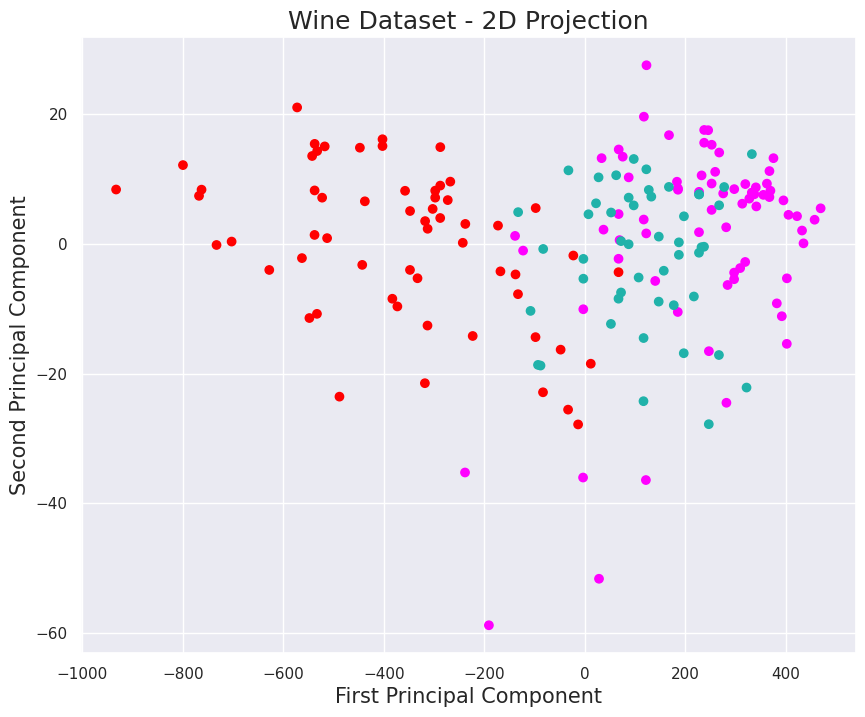

In [5]:
# Define a function to assign colors based on class labels
def colors(label):
    if label == 0:
        return "red"  # Class 0 in the Wine dataset
    elif label == 1:
        return "magenta"  # Class 1 in the Wine dataset
    else:
        return "lightseagreen"  # Class 2 in the Wine dataset

# Apply the colors function to create a list of colors for each data point
c = [colors(label) for label in y]

# Plot the reduced dataset
plt.figure(figsize=(10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c=c)
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Second Principal Component", fontsize=15)
plt.title("Wine Dataset - 2D Projection", fontsize=18)
plt.show()

In [8]:
from sklearn import preprocessing

# Scale the data
scaled_X = preprocessing.scale(X)

# Perform PCA
pca = PCA()
pca.fit(scaled_X)

# Print explained variance ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

Explained Variance Ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


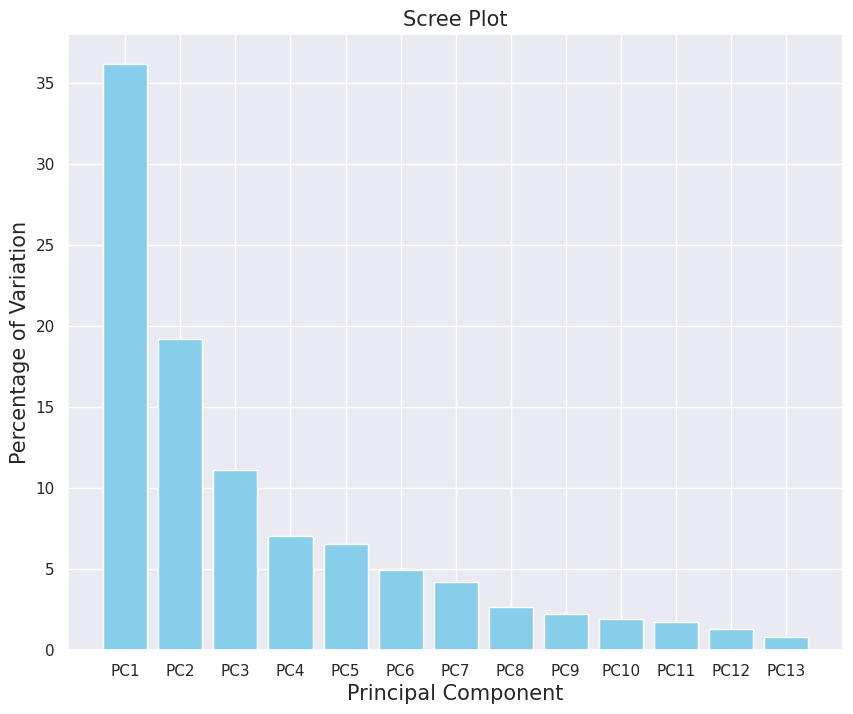

In [9]:
# Calculate the explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Convert explained variance to percentage
per_var = explained_variance * 100

# Determine the number of principal components to plot
num_components = len(per_var)

# Create labels for the principal components
labels = [f"PC{i}" for i in range(1, num_components + 1)]

# Plot the Scree Plot
plt.figure(figsize=(10, 8))
plt.bar(x=range(1, num_components + 1), height=per_var, tick_label=labels, color='skyblue')
plt.xlabel('Principal Component', fontsize=15)
plt.ylabel('Percentage of Variation', fontsize=15)
plt.title('Scree Plot', fontsize=15)
plt.show()

In [11]:
# Define the number of principal components to consider
num_components = 4

# Generate labels for the principal components
pc_labels = [f"PC{i}" for i in range(1, num_components + 1)]

# Transpose the pca.components_ array and select the first 'selected_components'
components_df = pd.DataFrame(data=pca.components_[:num_components].T, columns=pc_labels, index=wine_data.feature_names)

# Display the DataFrame
components_df

,PC1,PC2,PC3,PC4
alcohol,0.144329,-0.483652,-0.207383,-0.017856
malic_acid,-0.245188,-0.224931,0.089013,0.536890
ash,-0.002051,-0.316069,0.626224,-0.214176
alcalinity_of_ash,-0.239320,0.010591,0.612080,0.060859
magnesium,0.141992,-0.299634,0.130757,-0.351797
total_phenols,0.394661,-0.065040,0.146179,0.198068
flavanoids,0.422934,0.003360,0.150682,0.152295
nonflavanoid_phenols,-0.298533,-0.028779,0.170368,-0.203301
proanthocyanins,0.313429,-0.039302,0.149454,0.399057
color_intensity,-0.088617,-0.529996,-0.137306,0.065926


In [13]:
# Apply PCA to the scaled data
pca = PCA()
pca.fit(scaled_X)
pca_data = pca.transform(scaled_X)

# Generate labels for the principal components
pc_labels = [f"PC{i}" for i in range(1, pca_data.shape[1] + 1)]

# Create a DataFrame for the transformed data
pca_df = pd.DataFrame(pca_data, columns=pc_labels)

# Display the DataFrame
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [14]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Apply PCA with a specified number of components (4 in this case)
pca = PCA(n_components=4)  # Choose the number of components you want (4)
pca_data = pca.fit_transform(scaled_X)

# Generate labels for the principal components
pc_labels = [f"PC{i}" for i in range(1, pca_data.shape[1] + 1)]

# Create a DataFrame for the transformed data
pca_df = pd.DataFrame(pca_data, columns=pc_labels)

# Add target labels to the PCA DataFrame
projected_df = pd.concat([pca_df, wine_df['target']], axis=1, names=['PC1', 'PC2', 'PC3', 'PC4', 'target'])

# Display the PCA DataFrame
display(pca_df)
display(projected_df)

# Show the color associated to the different types of wine in the dataset
projected_df["color"] = c
projected_df

,PC1,PC2,PC3,PC4
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902
3,3.757066,-2.756372,-0.176192,0.567983
4,1.008908,-0.869831,2.026688,-0.409766
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527
174,-2.601956,-1.757229,0.207581,0.349496
175,-2.677839,-2.760899,-0.940942,0.312035
176,-2.387017,-2.297347,-0.550696,-0.688285


,PC1,PC2,PC3,PC4,target
0,3.316751,-1.443463,-0.165739,-0.215631,0.0
1,2.209465,0.333393,-2.026457,-0.291358,0.0
2,2.516740,-1.031151,0.982819,0.724902,0.0
3,3.757066,-2.756372,-0.176192,0.567983,0.0
4,1.008908,-0.869831,2.026688,-0.409766,0.0
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,2.0
174,-2.601956,-1.757229,0.207581,0.349496,2.0
175,-2.677839,-2.760899,-0.940942,0.312035,2.0
176,-2.387017,-2.297347,-0.550696,-0.688285,2.0


,PC1,PC2,PC3,PC4,target,color
0,3.316751,-1.443463,-0.165739,-0.215631,0.0,red
1,2.209465,0.333393,-2.026457,-0.291358,0.0,red
2,2.516740,-1.031151,0.982819,0.724902,0.0,red
3,3.757066,-2.756372,-0.176192,0.567983,0.0,red
4,1.008908,-0.869831,2.026688,-0.409766,0.0,red
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,2.0,lightseagreen
174,-2.601956,-1.757229,0.207581,0.349496,2.0,lightseagreen
175,-2.677839,-2.760899,-0.940942,0.312035,2.0,lightseagreen
176,-2.387017,-2.297347,-0.550696,-0.688285,2.0,lightseagreen


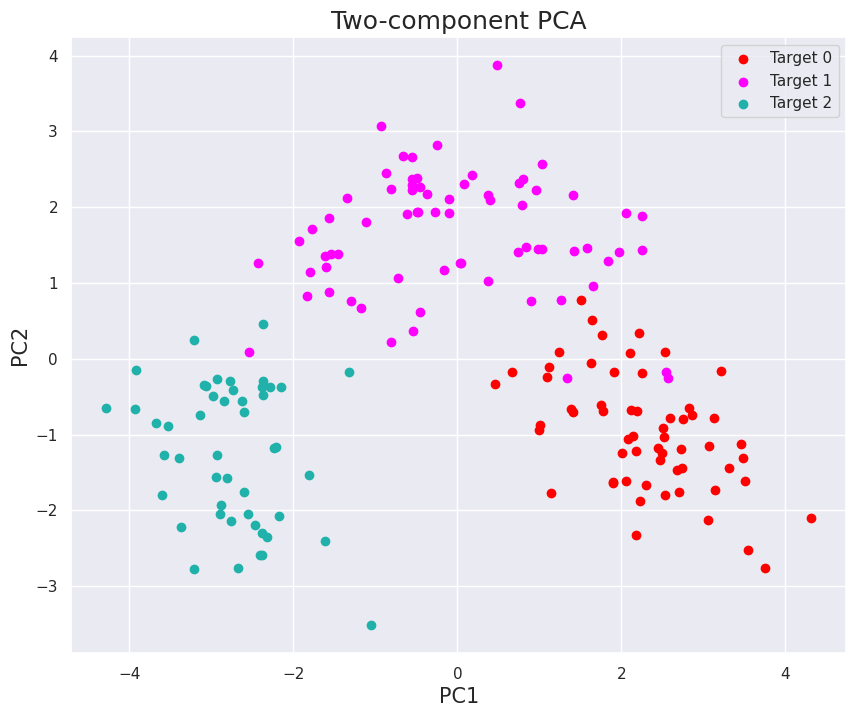

In [15]:
# Define target values and corresponding colors for the wine dataset
targets = [0, 1, 2]  # Wine dataset has target values 0, 1, and 2
colors = ["red", "magenta", "lightseagreen"]

# Create a scatter plot for the two principal components
plt.figure(figsize=(10, 8))

# Plot each target class separately
for target, color in zip(targets, colors):
    # Select rows corresponding to the current target
    temp_df = projected_df[projected_df['target'] == target]

    # Scatter plot for the current target
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c=color,
                label=f"Target {target}")

# Set axis labels and title
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.title('Two-component PCA', fontsize=18)

# Add legend to differentiate targets
plt.legend()

# Display the plot
plt.show()

# Utilizing Scatter Plots for Understanding PCA:

Scatter plots play a key role in comprehending PCA results. Here's how:

**Data Projection:** In a scatter plot, each point represents an observation projected onto the principal components. The position of a point is determined by its values along these components.

**Class Separation:** Coloring points based on their original labels (e.g., classes in a classification problem) allows for a quick assessment of class separation. Well-separated clusters indicate effective discrimination between classes, while overlapping points suggest potential challenges.

**Insights into Relationships:** Scatter plots unveil patterns, relationships, and clusters within the data. Examining the distribution of points helps interpret the impact of principal components on capturing different aspects of the dataset.

**Reduced Dimensional Understanding:** Scatter plots provide an intuitive way to grasp the reduced-dimensional representation achieved by PCA. They offer a visual snapshot of the transformed data, aiding in the interpretation and communication of results.

# Conclusion

This series of code interactions delved into the application of Principal Component Analysis (PCA) using the Wine dataset. Initially, we manually executed PCA on the dataset by centering the data, performing singular value decomposition, and validating the reconstruction of the original data. Subsequently, we utilized the scikit-learn library to apply PCA to the Wine dataset. We visualized the variance explained by each principal component, generated a scatter plot, and examined the linear combinations of original features represented by each principal component. Towards the end, we projected the data onto the first two principal components, offering insights into the distribution of wine samples in a reduced-dimensional space. Throughout the exploration, we addressed aspects such as data preprocessing, scaling, and demonstrated the resolution of specific errors associated with dataset structures